In [ ]:
https://pubs.acs.org/toc/iecred/57/51

In [1]:
from bs4 import BeautifulSoup
import requests
import os
import pandas as pd
import pdb
from tqdm import tqdm

In [2]:
baseurl = "https://pubs.acs.org/toc/iecred/57"
url_2019 = baseurl + "51"
print(url_2019)

https://pubs.acs.org/toc/iecred/5751


In [7]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
# options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver", chrome_options=options)

C:\Users\echen\AppData\Local\Temp\ipykernel_1768\3472690341.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver", chrome_options=options)
C:\Users\echen\AppData\Local\Temp\ipykernel_1768\3472690341.py:7: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver", chrome_options=options)


In [8]:
driver.get(url_2019)

In [9]:
page_source = driver.page_source


'<html lang="en-US" class="lang-en"><head>\n    <title>Just a moment...</title>\n    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=Edge">\n    <meta name="robots" content="noindex,nofollow">\n    <meta name="viewport" content="width=device-width,initial-scale=1">\n    <link href="/cdn-cgi/styles/challenges.css" rel="stylesheet">\n    \n\n<script src="/cdn-cgi/challenge-platform/h/b/orchestrate/managed/v1?ray=7bd22d6a1d562f03"></script><script src="https://challenges.cloudflare.com/turnstile/v0/api.js?onload=_cf_chl_turnstile_l&amp;render=explicit" async="" defer="" crossorigin="anonymous"></script></head>\n<body class="no-js">\n    <div class="main-wrapper" role="main">\n    <div class="main-content">\n        <h1 class="zone-name-title h1"><img src="/favicon.ico" class="heading-favicon" alt="Icon for pubs.acs.org">pubs.acs.org</h1><h2 id="challenge-running" class="h2">Checking if the site connection is secure</h
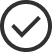

In [10]:
page_source

In [3]:
url_2019_response = requests.get(url_2019)
soup_2019 = BeautifulSoup(url_2019_response.content, "html.parser")

In [4]:
soup_2019

<!DOCTYPE html>

<html lang="en-US">
<head>
<title>Just a moment...</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="noindex,nofollow" name="robots"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<link href="/cdn-cgi/styles/challenges.css" rel="stylesheet"/>
</head>
<body class="no-js">
<div class="main-wrapper" role="main">
<div class="main-content">
<noscript>
<div id="challenge-error-title">
<div class="h2">
<span class="icon-wrapper">
<div class="heading-icon warning-icon"></div>
</span>
<span id="challenge-error-text">
                        Enable JavaScript and cookies to continue
                    </span>
</div>
</div>
</noscript>
<div id="trk_jschal_js" style="display:none;background-image:url('/cdn-cgi/images/trace/managed/nojs/transparent.gif?ray=7bd221dc7c8d7c6d')"></div>
<form action="/toc/iecred/5751?__cf_chl_f_tk=N6pULFpdUp11LDDQqNGGMKQlTumya5X52sN

In [ ]:
from bs4 import BeautifulSoup
import requests
import os
import pandas as pd
import pdb
from tqdm import tqdm
baseurl = "https://papers.nips.cc"
url_2019 = baseurl + "/paper_files/paper/2019"
print(url_2019)
url_2019_response = requests.get(url_2019)
soup_2019 = BeautifulSoup(url_2019_response.content, "html.parser")
# papers_2019 = soup_2019.find_all("li", {"class": "conference"})
papers_2019 = soup_2019.find_all("li", {"class": "none"}) #for 2019
papers_2019 = [(x.a.string, x.a["href"]) for x in papers_2019]

title = []
authors = []
abstract = []
year = []

bad_pages = []
for paper in tqdm(papers_2019):
    paper_page_url = baseurl+paper[1]
    paper_page_url_response = requests.get(paper_page_url)
    paper_soup = BeautifulSoup(paper_page_url_response.content, "html.parser")
    paper_p = paper_soup.find_all("p")
    paper_title = paper[0]
    paper_author = paper_p[1].i.string
    if paper_p[2].string is not None:
        paper_abstract = paper_p[2].string
    elif paper_p[2].p is not None and paper_p[2].p.string is not None:
        paper_abstract = paper_p[2].p.string
    else:
        bad_pages.append(paper_author)
        continue

    title.append(paper_title)
    authors.append(paper_author)
    abstract.append(paper_abstract)
    year.append("2019")

df = pd.DataFrame(data={"title":title, "authors":authors, "abstract": abstract, "year": year})
df.to_csv("nips_2019.csv", index=False)
print(bad_pages)
print(df.head())